In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [2]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000
2,4115,austin,"6804 Canal St, Austin, TX 78741 is a single fa...",Single Family,30.227398,-97.696083,0,False,1952,0,5619.0,3.333333,11,1.0,2,0-250000
3,6926,austin,Beautiful large lot with established trees. Lo...,Single Family,30.205469,-97.792351,4,False,1976,0,6416.0,4.000000,14,2.0,4,0-250000
4,14480,austin,Stunning NW Hills designer remodel by Cedar an...,Single Family,30.345106,-97.767426,2,False,1984,0,10759.0,7.000000,16,3.0,5,650000+


In [ ]:
# X Uid - Property ID
# city - City where the property is located
# X description - Free text description of the property
# homeType - Property type
# X latitude - Latitude of the property’s location
# X longitude - Longitude of the property’s location
# garageSpaces - number of garage spaces
# hasSpa - Boolean. True if the property has a spa
# yearBuilt - the year when the property was built
# numOfPatioAndPorchFeatures - number of porches and patios
# lotSizeSqFt - Lot Size in squared feet
# avgSchoolRating - average school district rating
# MedianStudentsPerTeacher - median students per teacher in the school district
# numOfBathrooms - number of bathrooms
# numOfBedrooms - number of bedrooms
# priceRange - property price range

In [5]:
data["age"]=2024-data['yearBuilt']

In [6]:
excluded = ['uid', 'description', 'latitude','longitude','yearBuilt']
columns = [col for col in list(data.columns) if col not in excluded]
print(columns)

data = data[columns]

['city', 'homeType', 'garageSpaces', 'hasSpa', 'numOfPatioAndPorchFeatures', 'lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms', 'priceRange', 'age']


In [7]:
data.isna().sum()

city                          0
homeType                      0
garageSpaces                  0
hasSpa                        0
numOfPatioAndPorchFeatures    0
lotSizeSqFt                   0
avgSchoolRating               0
MedianStudentsPerTeacher      0
numOfBathrooms                0
numOfBedrooms                 0
priceRange                    0
age                           0
dtype: int64

In [8]:
column_list = data.columns.values.tolist()
for column_name in column_list:
    print(column_name, len(data[column_name].unique()),data[column_name].unique(), '\n')


city 7 ['austin' 'pflugerville' 'del valle' 'manchaca' 'dripping springs'
 'west lake hills' 'driftwood'] 

homeType 10 ['Single Family' 'Multiple Occupancy' 'Condo' 'Apartment' 'MultiFamily'
 'Townhouse' 'Other' 'Residential' 'Mobile / Manufactured' 'Vacant Land'] 

garageSpaces 13 [ 0  4  2  1  3  6  9  5  7 10  8 12 22] 

hasSpa 2 [False  True] 

numOfPatioAndPorchFeatures 9 [0 1 2 4 3 5 6 7 8] 

lotSizeSqFt 1105 [1.02366e+05 6.53400e+03 5.61900e+03 ... 5.70000e+03 5.96772e+06
 4.22532e+04] 

avgSchoolRating 27 [7.         6.66666667 3.33333333 4.         4.66666667 5.66666667
 5.         3.         6.         7.66666667 5.33333333 8.
 7.33333333 4.33333333 8.33333333 9.         2.66666667 8.66666667
 9.5        3.66666667 3.5        6.33333333 9.33333333 2.33333333
 5.77869409 8.5        6.5       ] 

MedianStudentsPerTeacher 10 [17 16 11 14 15 13 12 18 19 10] 

numOfBathrooms 15 [ 4.   3.   1.   2.   7.   8.   2.5  1.5  3.5  5.   6.   4.5 10.   6.5
  5.5] 

numOfBedrooms 9 [ 4  2 

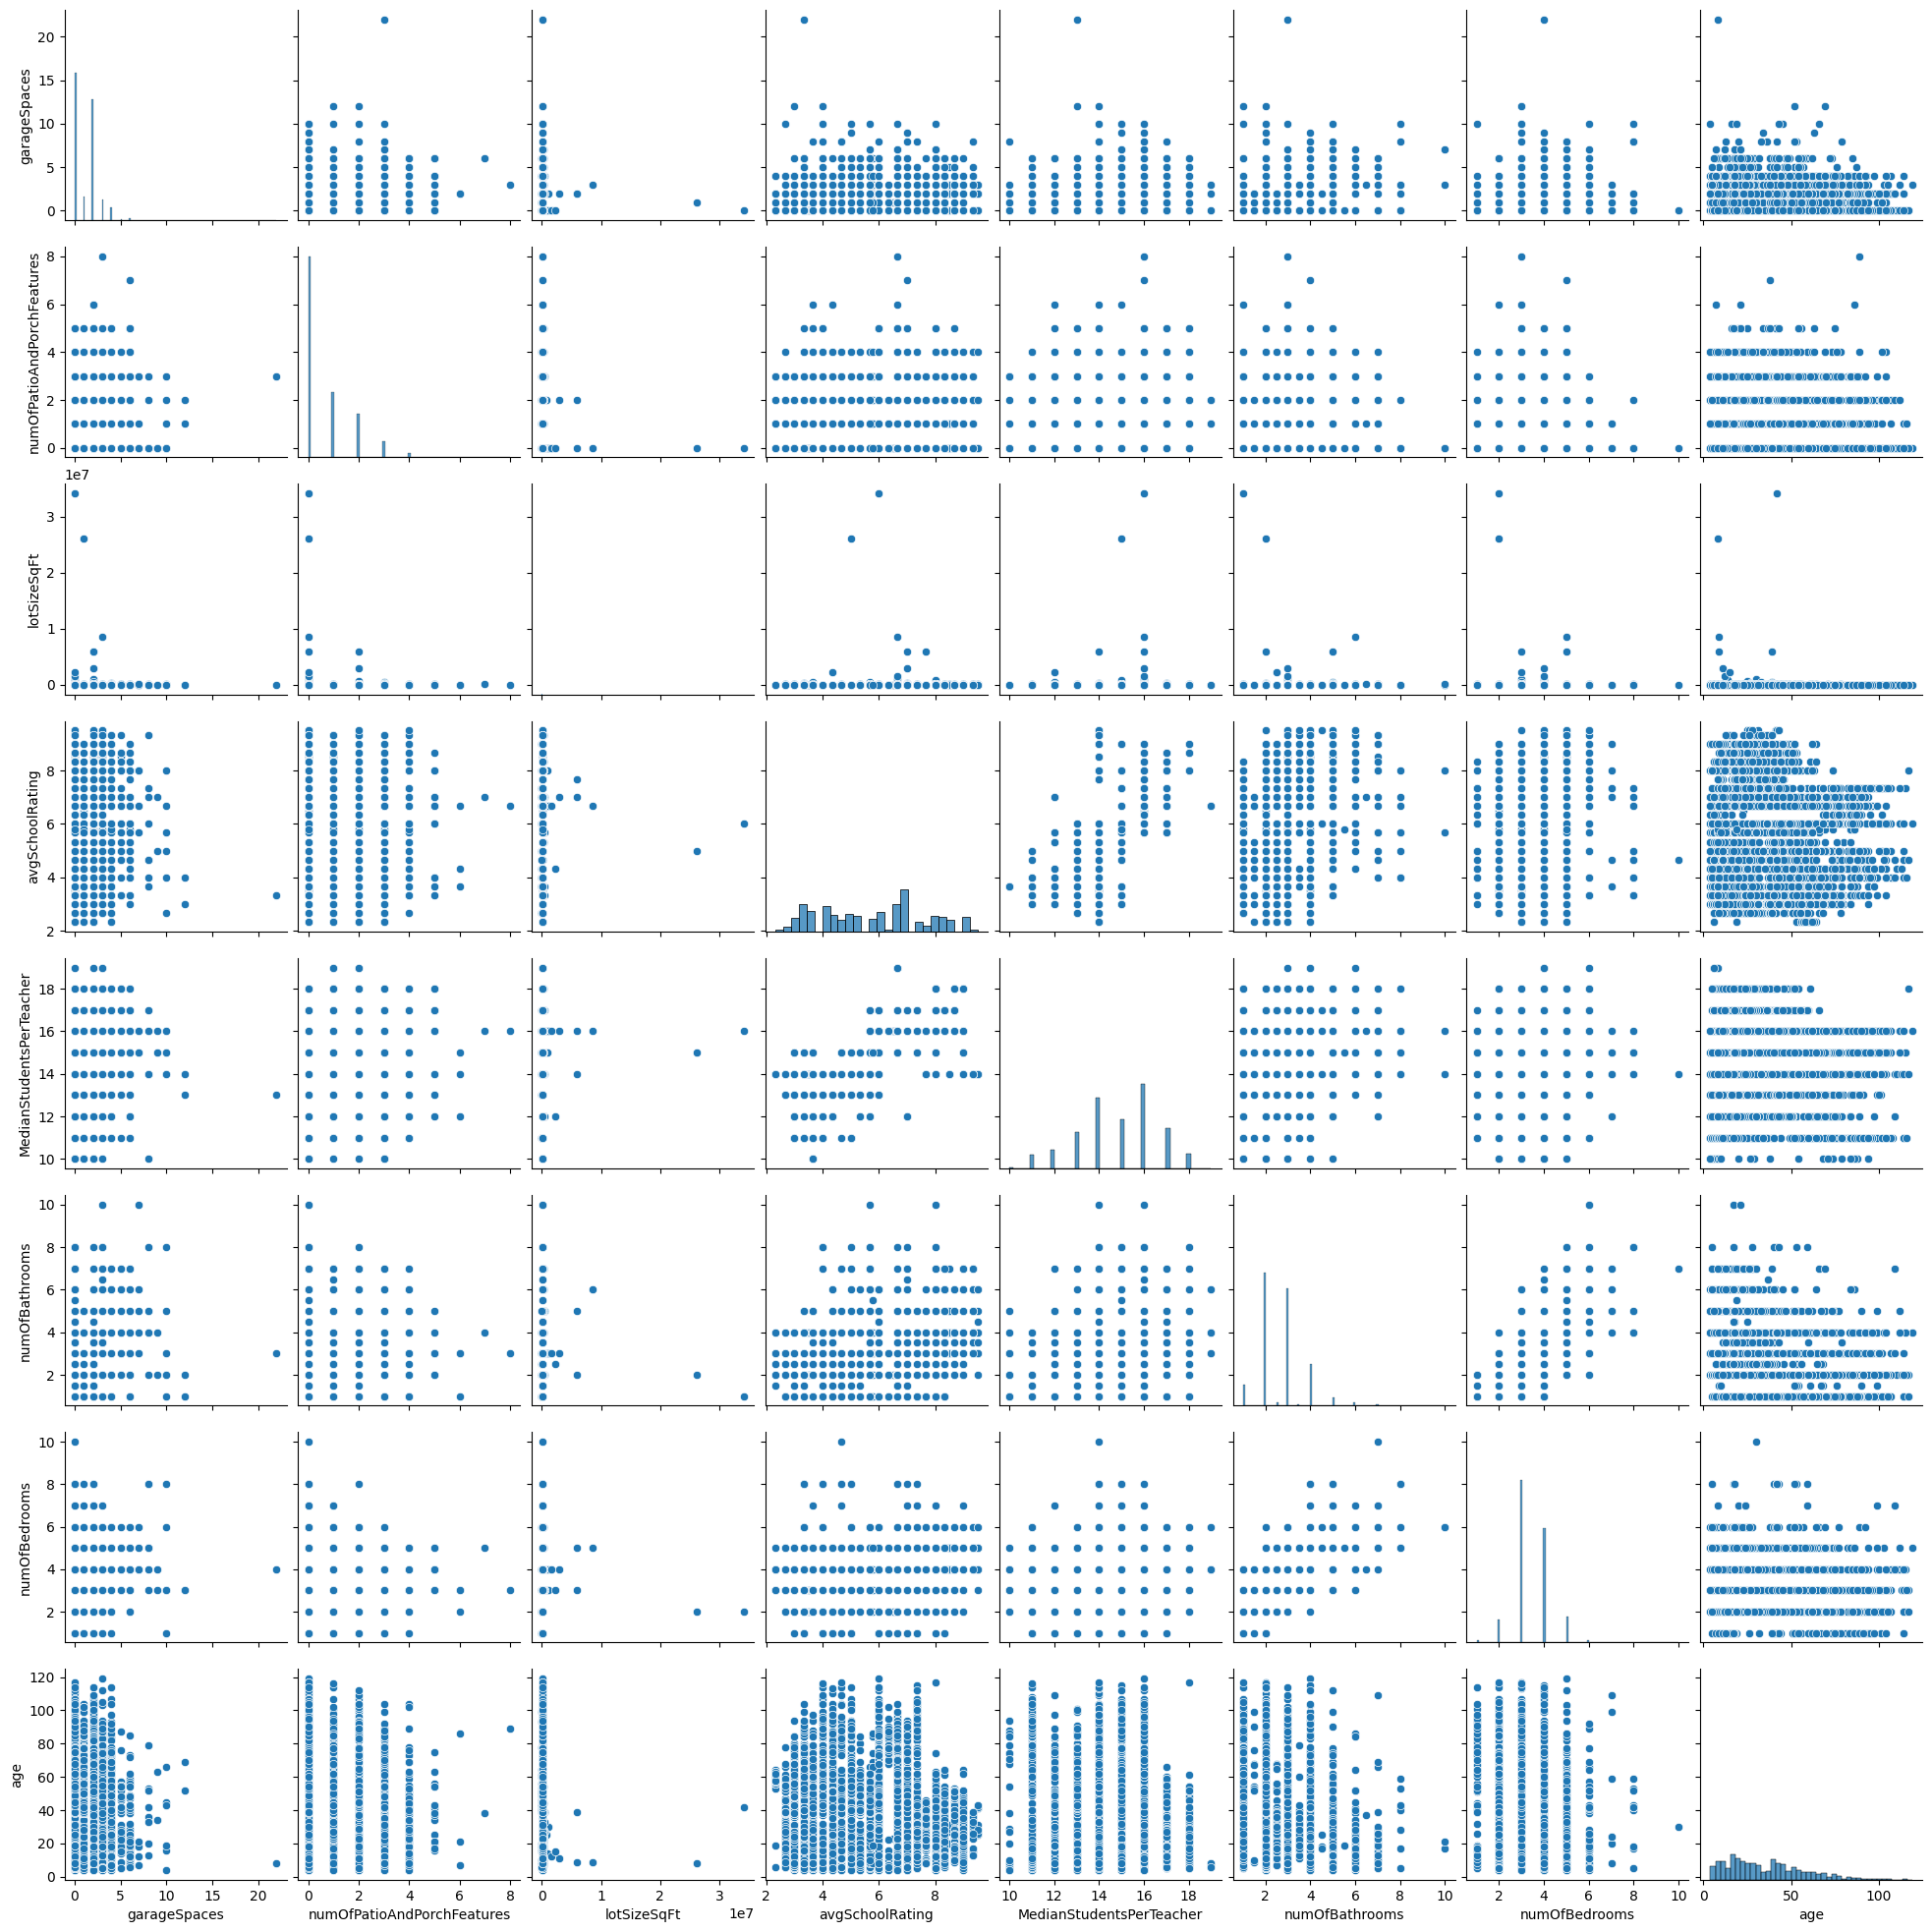

In [ ]:
# Pairplot for selected features
selected_features = ['garageSpaces','numOfPatioAndPorchFeatures','lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher','numOfBathrooms', 'numOfBedrooms', 'priceRange', 'age']
sns.pairplot(data[selected_features])
plt.show()

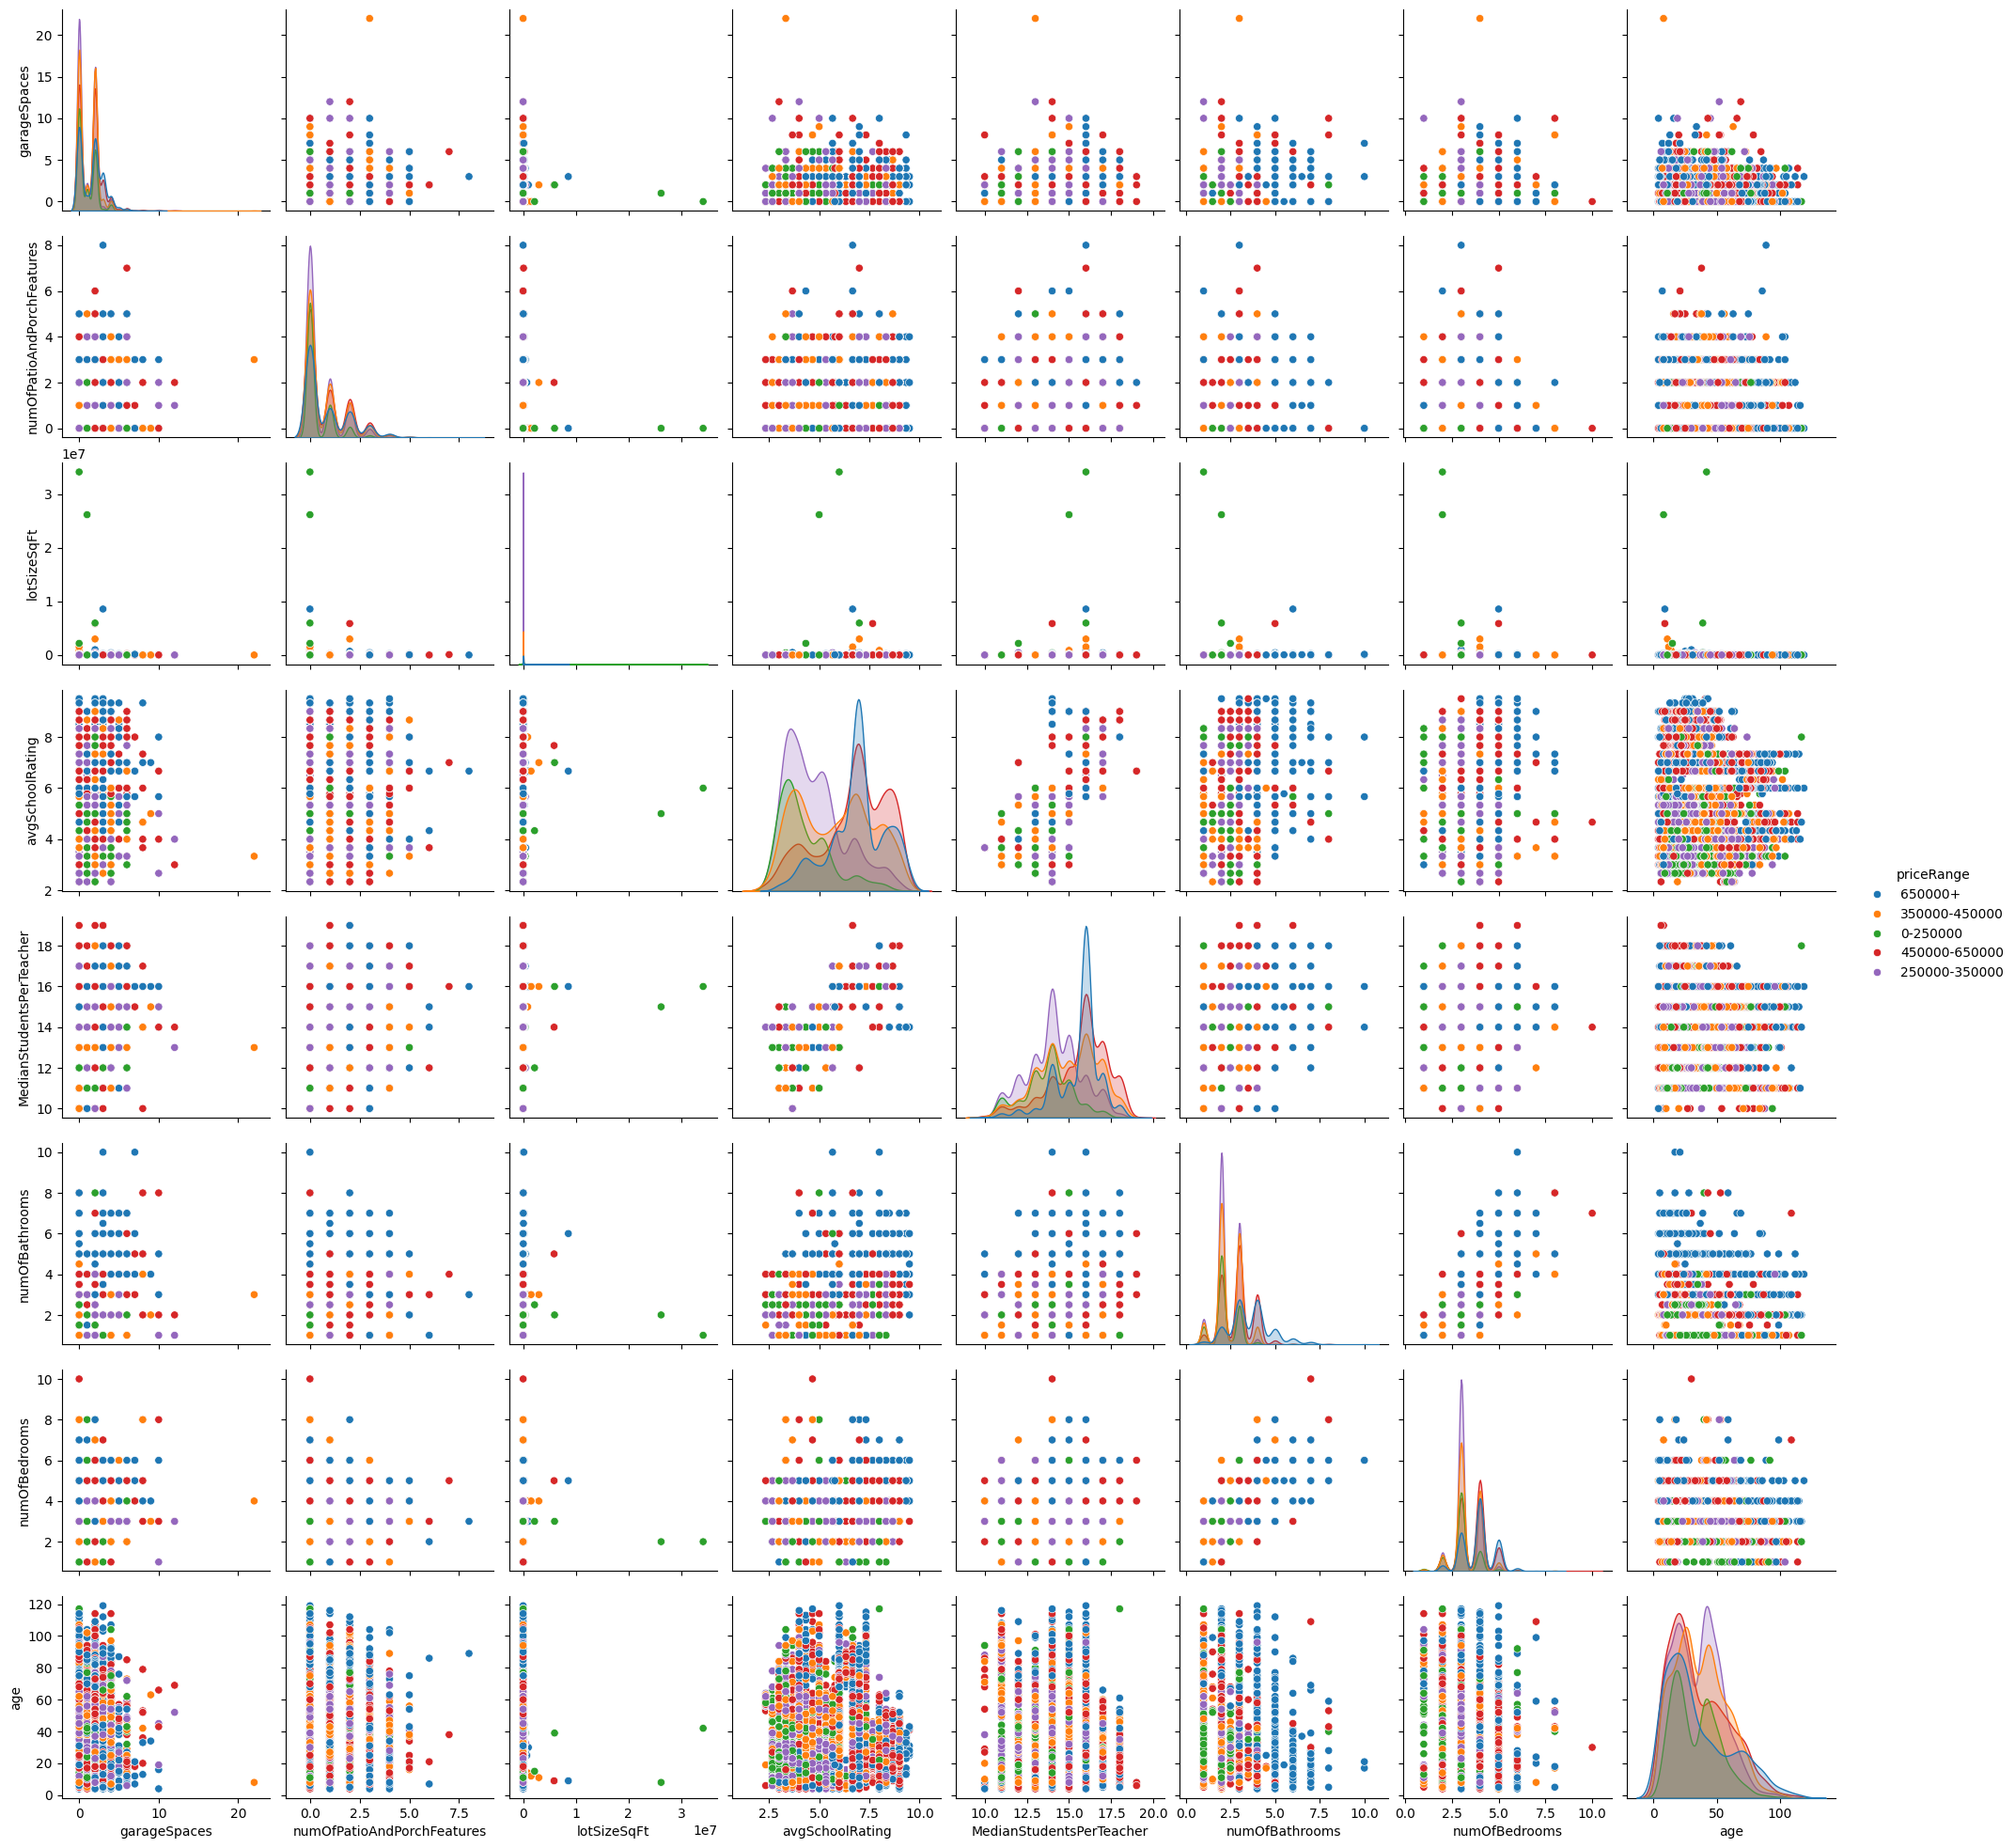

In [ ]:
# Pairplot for selected features
selected_features = ['garageSpaces','numOfPatioAndPorchFeatures','lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher','numOfBathrooms', 'numOfBedrooms', 'priceRange', 'age']
sns.pairplot(data[selected_features],hue="priceRange")
plt.show()

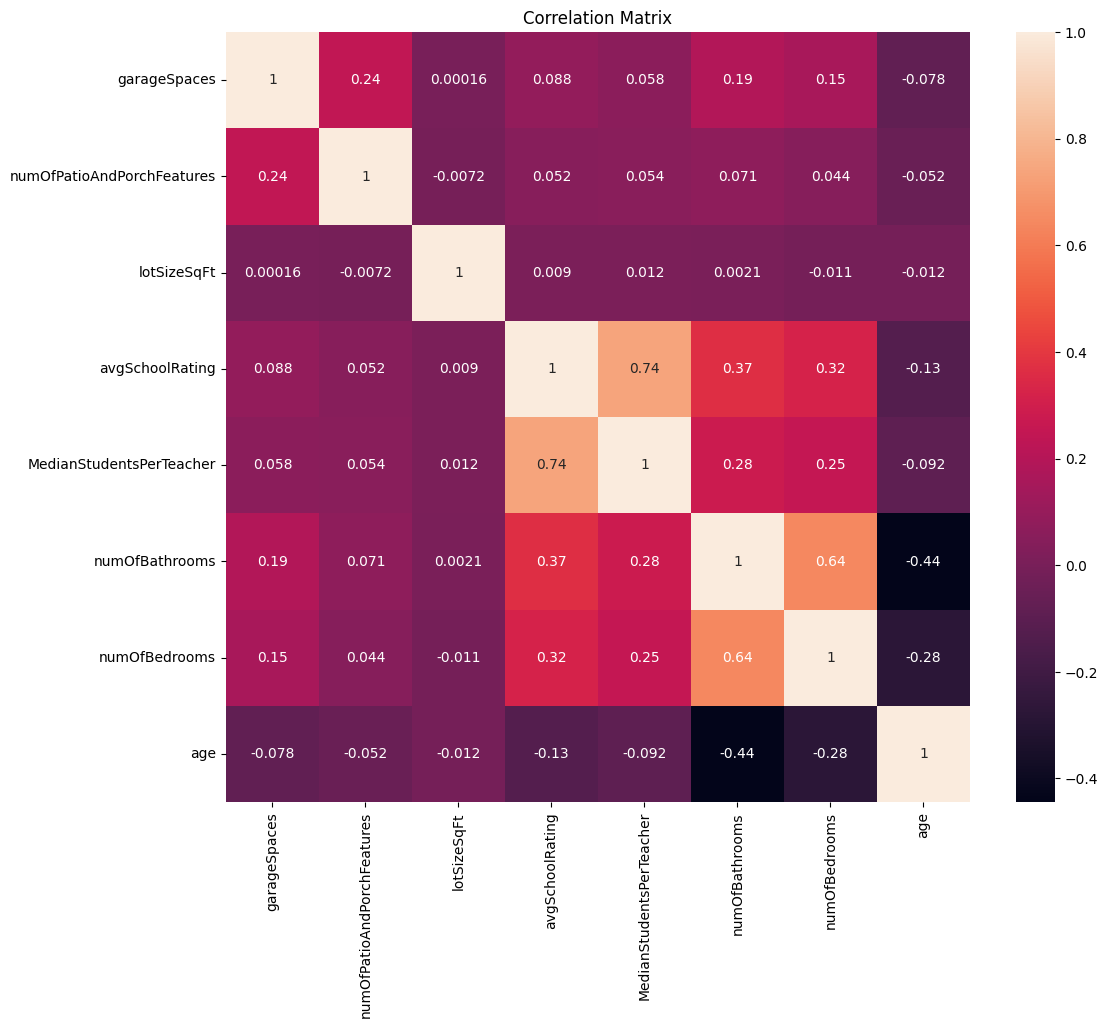

In [ ]:
# Calculate correlation matrix
selected_features = ['garageSpaces','numOfPatioAndPorchFeatures','lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher','numOfBathrooms', 'numOfBedrooms', 'age']
correlation_matrix = data[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Convert categorical variables to numerical representations
data = pd.get_dummies(data, columns=['city', 'homeType'], drop_first=True)

In [10]:
print(skew(data['lotSizeSqFt']))
data['lotSizeSqFt'] = np.log1p(data['lotSizeSqFt'])

64.98639833061142


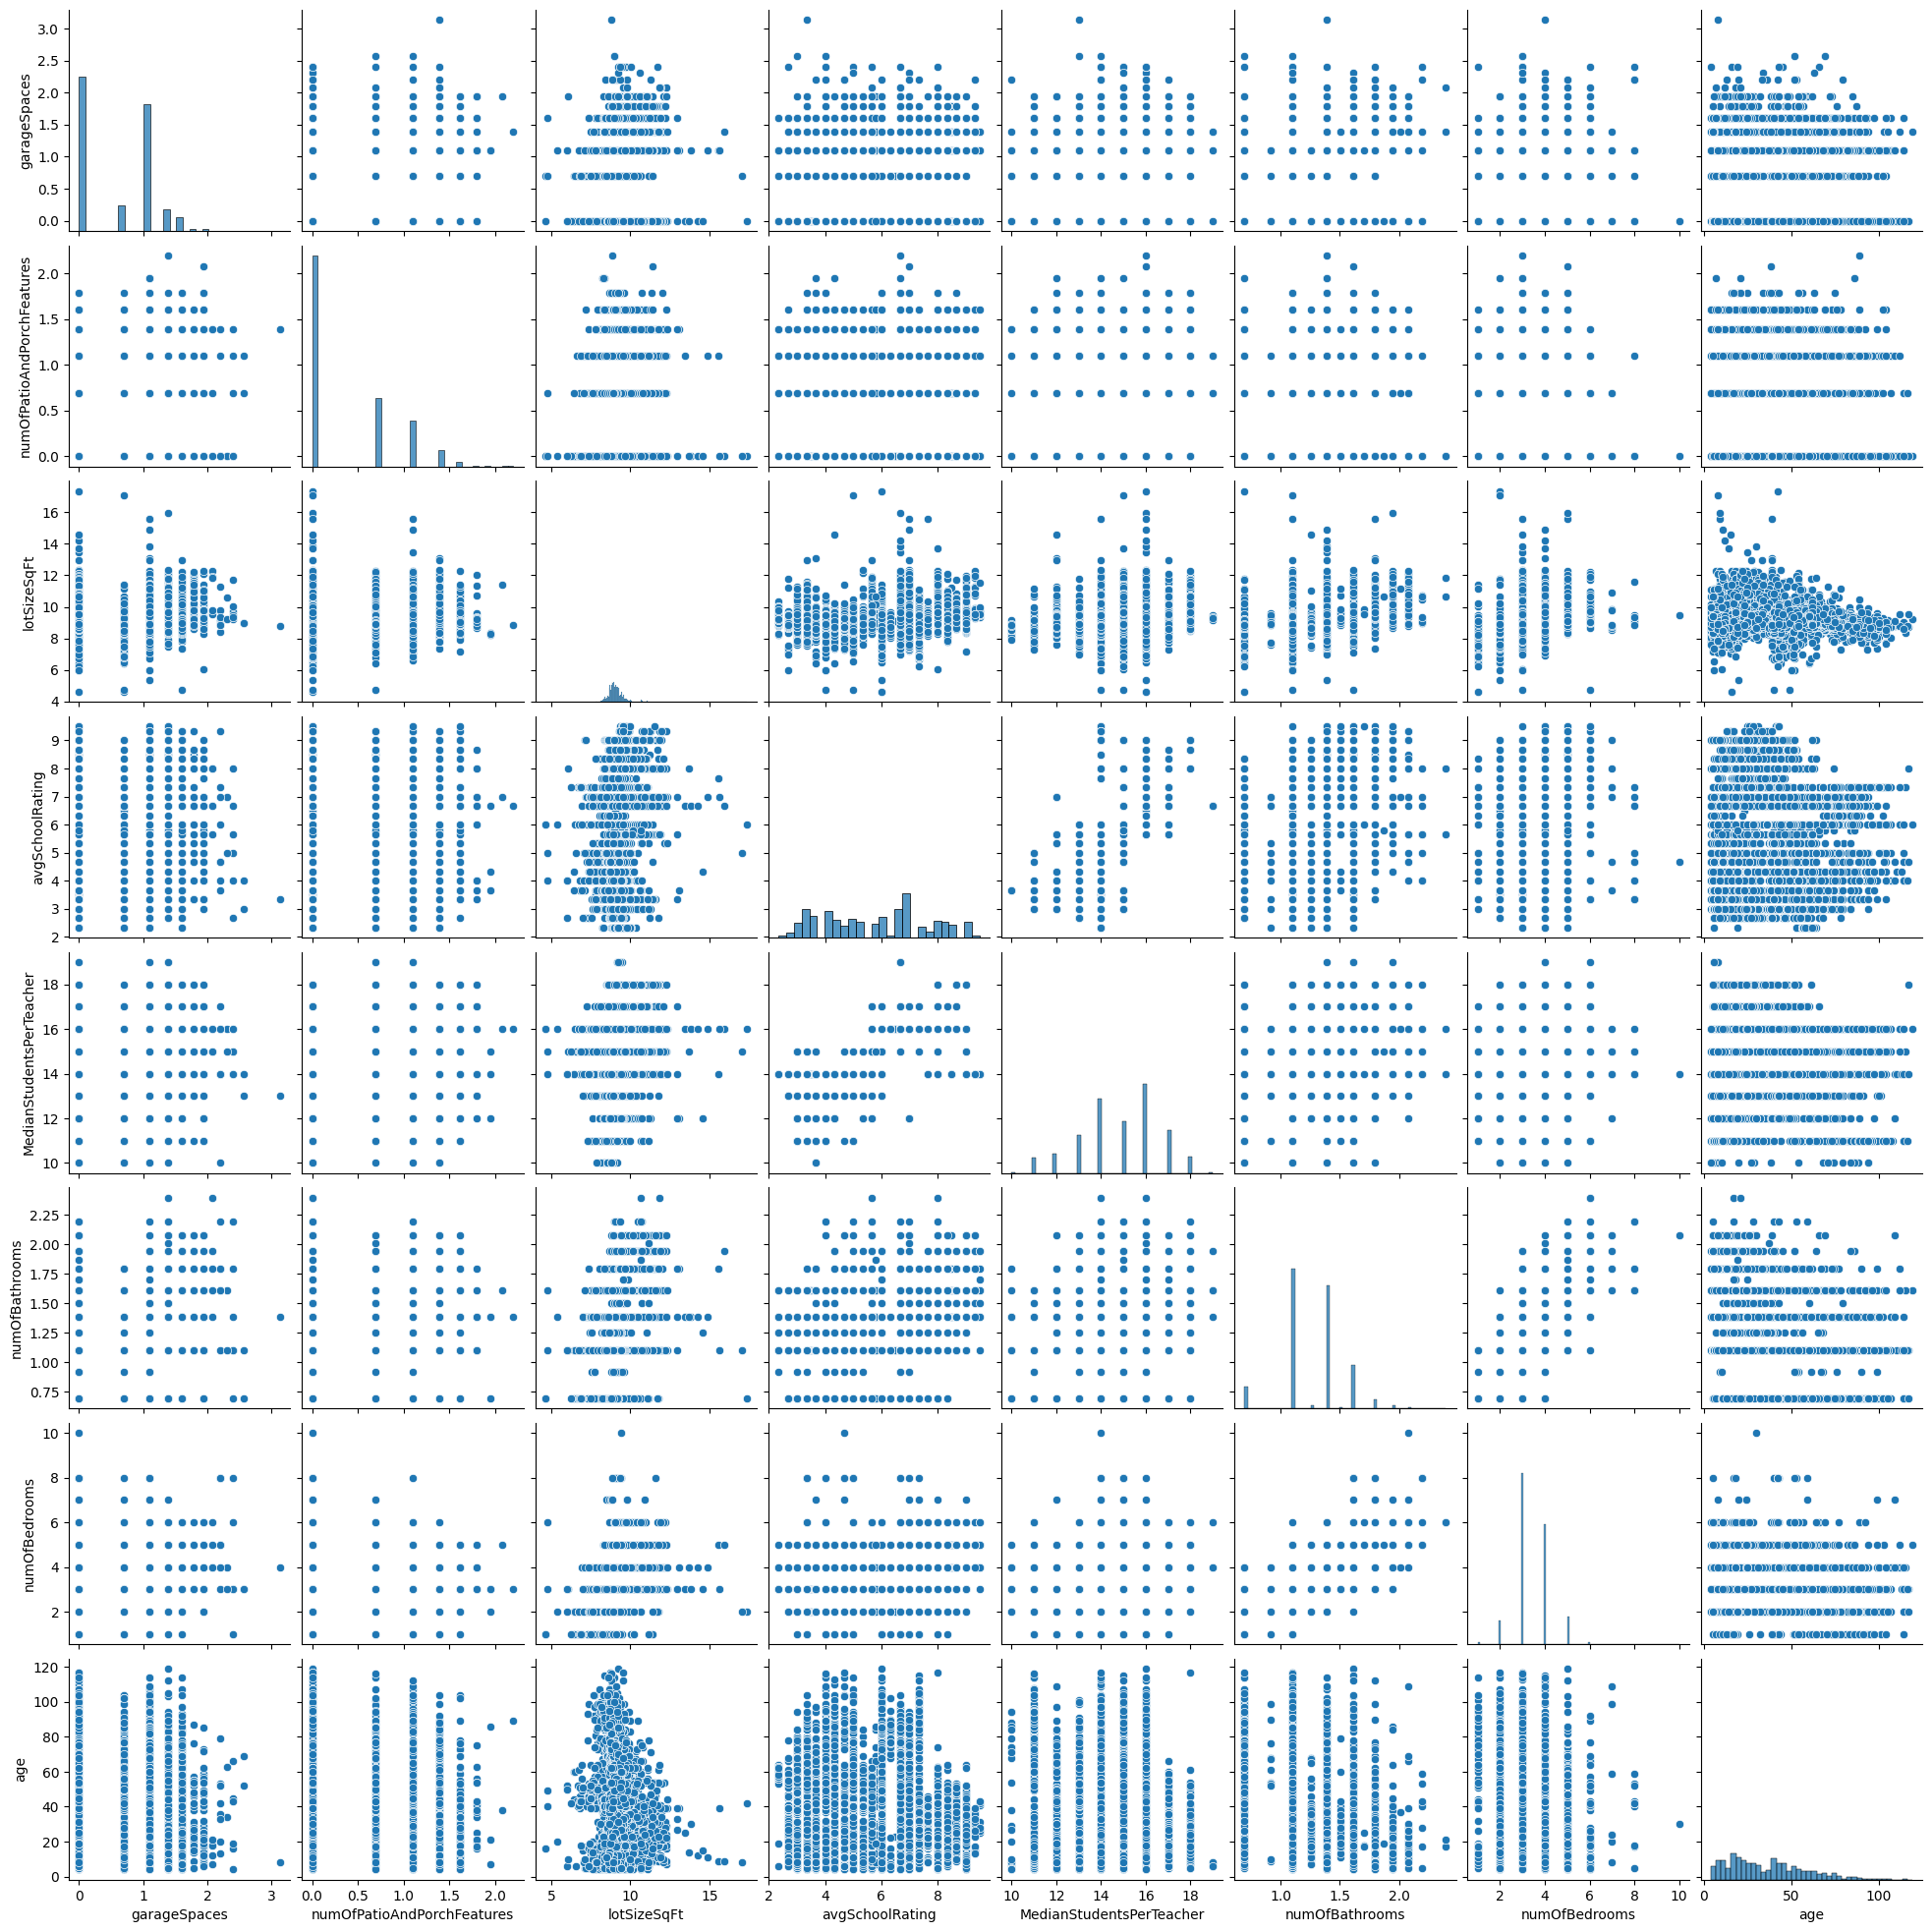

In [ ]:
# Pairplot for selected features
selected_features = ['garageSpaces','numOfPatioAndPorchFeatures','lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher','numOfBathrooms', 'numOfBedrooms', 'priceRange', 'age']
sns.pairplot(data[selected_features])
plt.show()

In [ ]:
print(data.columns)
print(len(data.columns))


Index(['garageSpaces', 'hasSpa', 'numOfPatioAndPorchFeatures', 'lotSizeSqFt',
       'avgSchoolRating', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'priceRange', 'age', 'city_del valle',
       'city_driftwood', 'city_dripping springs', 'city_manchaca',
       'city_pflugerville', 'city_west lake hills', 'homeType_Condo',
       'homeType_Mobile / Manufactured', 'homeType_MultiFamily',
       'homeType_Multiple Occupancy', 'homeType_Other', 'homeType_Residential',
       'homeType_Single Family', 'homeType_Townhouse', 'homeType_Vacant Land'],
      dtype='object')
25


In [ ]:
X = data.drop('priceRange', axis=1)
y = data['priceRange']

print(X.shape, y.shape)

(10000, 24) (10000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Index(['garageSpaces', 'hasSpa', 'numOfPatioAndPorchFeatures', 'lotSizeSqFt',
       'avgSchoolRating', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'age', 'city_del valle', 'city_driftwood',
       'city_dripping springs', 'city_manchaca', 'city_pflugerville',
       'city_west lake hills', 'homeType_Condo',
       'homeType_Mobile / Manufactured', 'homeType_MultiFamily',
       'homeType_Multiple Occupancy', 'homeType_Other', 'homeType_Residential',
       'homeType_Single Family', 'homeType_Townhouse', 'homeType_Vacant Land'],
      dtype='object') [5.99087621e-02 1.26395875e-02 5.29667859e-02 2.52040170e-01
 1.62399689e-01 8.94822796e-02 8.22190752e-02 4.88124266e-02
 2.19149243e-01 4.29819139e-03 9.32149080e-05 3.34719737e-05
 1.18775700e-04 9.79644126e-04 8.98899514e-06 3.96249366e-03
 4.13474223e-04 1.21058201e-04 1.42529947e-03 1.02512877e-04
 7.13572044e-04 6.12172338e-03 1.86167022e-03 1.27890343e-04]


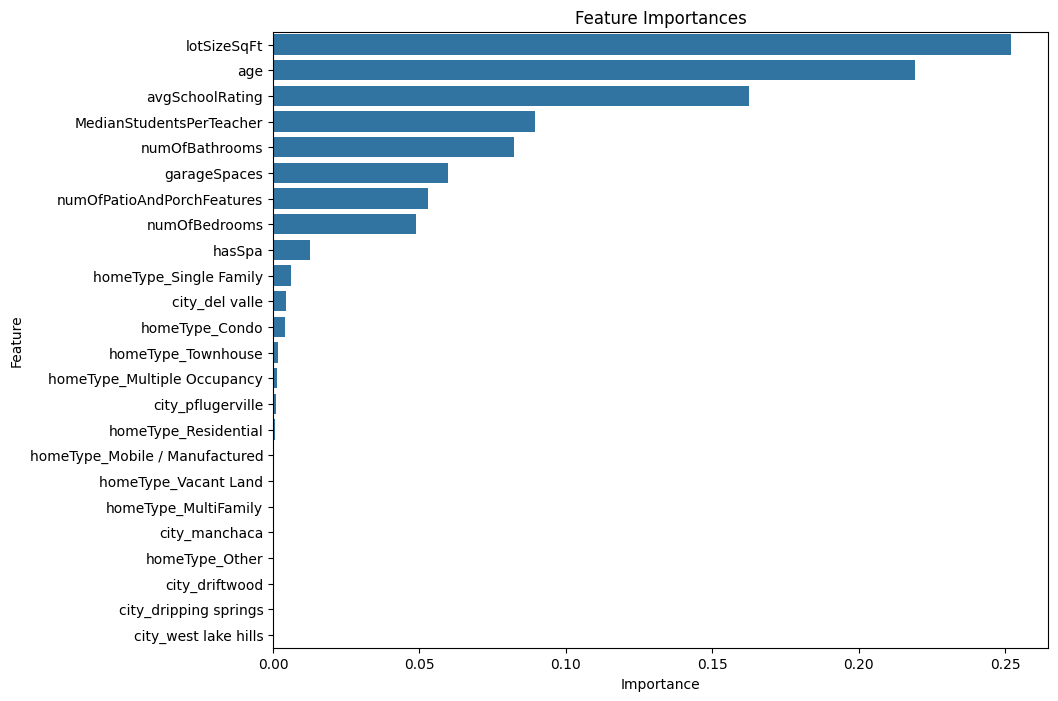

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
print(X.columns,feature_importances)

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
features_selected = list(feature_importance_df[feature_importance_df['Importance']>0.04]['Feature'])
features_selected

['lotSizeSqFt',
 'age',
 'avgSchoolRating',
 'MedianStudentsPerTeacher',
 'numOfBathrooms',
 'garageSpaces',
 'numOfPatioAndPorchFeatures',
 'numOfBedrooms']

In [ ]:
X_train = X_train[features_selected]
X_test = X_test[features_selected]
print(X_train.shape)
print(X_test.shape)

(9000, 8)
(1000, 8)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 4896 to 7270
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lotSizeSqFt                 9000 non-null   float64
 1   age                         9000 non-null   int64  
 2   avgSchoolRating             9000 non-null   float64
 3   MedianStudentsPerTeacher    9000 non-null   int64  
 4   numOfBathrooms              9000 non-null   float64
 5   garageSpaces                9000 non-null   float64
 6   numOfPatioAndPorchFeatures  9000 non-null   float64
 7   numOfBedrooms               9000 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 632.8 KB


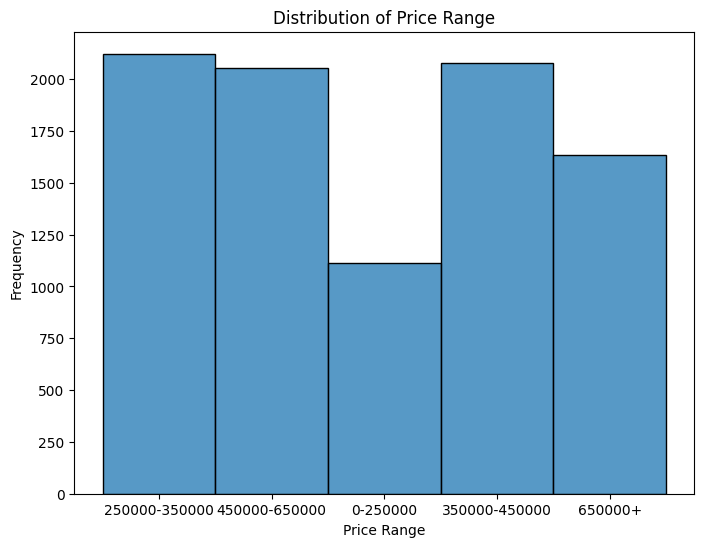

In [ ]:
# Visualize the distribution of the target variable (price range)
plt.figure(figsize=(8, 6))
sns.histplot(y_train, bins=20)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.531

Classification Report:
               precision    recall  f1-score   support

     0-250000       0.58      0.46      0.51       137
250000-350000       0.49      0.52      0.50       233
350000-450000       0.45      0.47      0.46       225
450000-650000       0.51      0.54      0.52       221
      650000+       0.69      0.67      0.68       184

     accuracy                           0.53      1000
    macro avg       0.54      0.53      0.54      1000
 weighted avg       0.53      0.53      0.53      1000


Confusion Matrix:
[[ 63  46  22   5   1]
 [ 31 120  59  18   5]
 [ 10  51 106  49   9]
 [  2  20  39 119  41]
 [  2   8   8  43 123]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}
# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compare models
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[name] = cv_scores

# Print results
for name, scores in results.items():
    print(f"Model: {name}")
    print(f"Cross-validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")
    print()

Model: Random Forest
Cross-validation Scores: [0.5375 0.533  0.539  0.539  0.542 ]
Mean Accuracy: 0.5381
Standard Deviation: 0.0029393876913398186

Model: Support Vector Machine
Cross-validation Scores: [0.399  0.4105 0.401  0.382  0.4045]
Mean Accuracy: 0.3994000000000001
Standard Deviation: 0.00953624664110571

Model: Gradient Boosting
Cross-validation Scores: [0.5295 0.5425 0.5465 0.532  0.554 ]
Mean Accuracy: 0.5409
Standard Deviation: 0.009107140056021992



In [ ]:
3from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
import joblib
# Save the trained model to a file
joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
# Load the saved Random Forest model from file
loaded_model = joblib.load('random_forest_model.pkl')


In [ ]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)
print(y_pred[:10])
y_pred = loaded_model.predict(X_test)
print(y_pred[:10])

['350000-450000' '350000-450000' '650000+' '350000-450000' '350000-450000'
 '250000-350000' '250000-350000' '650000+' '650000+' '0-250000']
['350000-450000' '350000-450000' '650000+' '350000-450000' '350000-450000'
 '250000-350000' '250000-350000' '650000+' '650000+' '0-250000']


In [ ]:
raw_test = X_test.iloc[0,:]
print(X_test.iloc[0,:])
raw_test = np.array(raw_test)
print(raw_test)
raw_test = raw_test.reshape([1,8])
print(raw_test)

y_pred = rf_classifier.predict(raw_test)
print(y_pred)

lotSizeSqFt                   23958.000000
age                              46.000000
avgSchoolRating                   7.333333
MedianStudentsPerTeacher         17.000000
numOfBathrooms                    2.000000
garageSpaces                      2.000000
numOfPatioAndPorchFeatures        0.000000
numOfBedrooms                     3.000000
Name: 6252, dtype: float64
[2.39580000e+04 4.60000000e+01 7.33333333e+00 1.70000000e+01
 2.00000000e+00 2.00000000e+00 0.00000000e+00 3.00000000e+00]
[[2.39580000e+04 4.60000000e+01 7.33333333e+00 1.70000000e+01
  2.00000000e+00 2.00000000e+00 0.00000000e+00 3.00000000e+00]]
['350000-450000']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Importing libraries

In [ ]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from scipy.stats import skew
import sklearn

## Read dataset


In [ ]:
#Reading dataset
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000
2,4115,austin,"6804 Canal St, Austin, TX 78741 is a single fa...",Single Family,30.227398,-97.696083,0,False,1952,0,5619.0,3.333333,11,1.0,2,0-250000
3,6926,austin,Beautiful large lot with established trees. Lo...,Single Family,30.205469,-97.792351,4,False,1976,0,6416.0,4.000000,14,2.0,4,0-250000
4,14480,austin,Stunning NW Hills designer remodel by Cedar an...,Single Family,30.345106,-97.767426,2,False,1984,0,10759.0,7.000000,16,3.0,5,650000+


In [ ]:
data.columns
print(len(data.columns))

16


In [ ]:
# --- Uid - Property ID
# city - City where the property is located
# --- description - Free text description of the property
# homeType - Property type
# --- latitude - Latitude of the property’s location
# --- longitude - Longitude of the property’s location
# garageSpaces - number of garage spaces
# hasSpa - Boolean. True if the property has a spa
# yearBuilt - the year when the property was built
# numOfPatioAndPorchFeatures - number of porches and patios
# lotSizeSqFt - Lot Size in squared feet
# avgSchoolRating - average school district rating
# MedianStudentsPerTeacher - median students per teacher in the school district
# numOfBathrooms - number of bathrooms
# numOfBedrooms - number of bedrooms
# Y = priceRange - property price range

In [ ]:
# Transforming feature yearBuilt for Age
data['age'] = 2024 - data['yearBuilt']

## Exploratory Data Analysis


In [ ]:
# Discarting some unnecesarry features
avoid = ['uid','description','latitude','longitude','yearBuilt']

columns = [col for col in list(data.columns) if col not in avoid]
columns

['city',
 'homeType',
 'garageSpaces',
 'hasSpa',
 'numOfPatioAndPorchFeatures',
 'lotSizeSqFt',
 'avgSchoolRating',
 'MedianStudentsPerTeacher',
 'numOfBathrooms',
 'numOfBedrooms',
 'priceRange',
 'age']

In [ ]:
data = data[columns]

In [ ]:
data.head()

,city,homeType,garageSpaces,hasSpa,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange,age
0,austin,Single Family,0,False,0,102366.0,7.000000,17,4.0,4,650000+,36
1,austin,Single Family,0,False,0,6534.0,6.666667,16,3.0,4,350000-450000,27
2,austin,Single Family,0,False,0,5619.0,3.333333,11,1.0,2,0-250000,72
3,austin,Single Family,4,False,0,6416.0,4.000000,14,2.0,4,0-250000,48
4,austin,Single Family,2,False,0,10759.0,7.000000,16,3.0,5,650000+,40


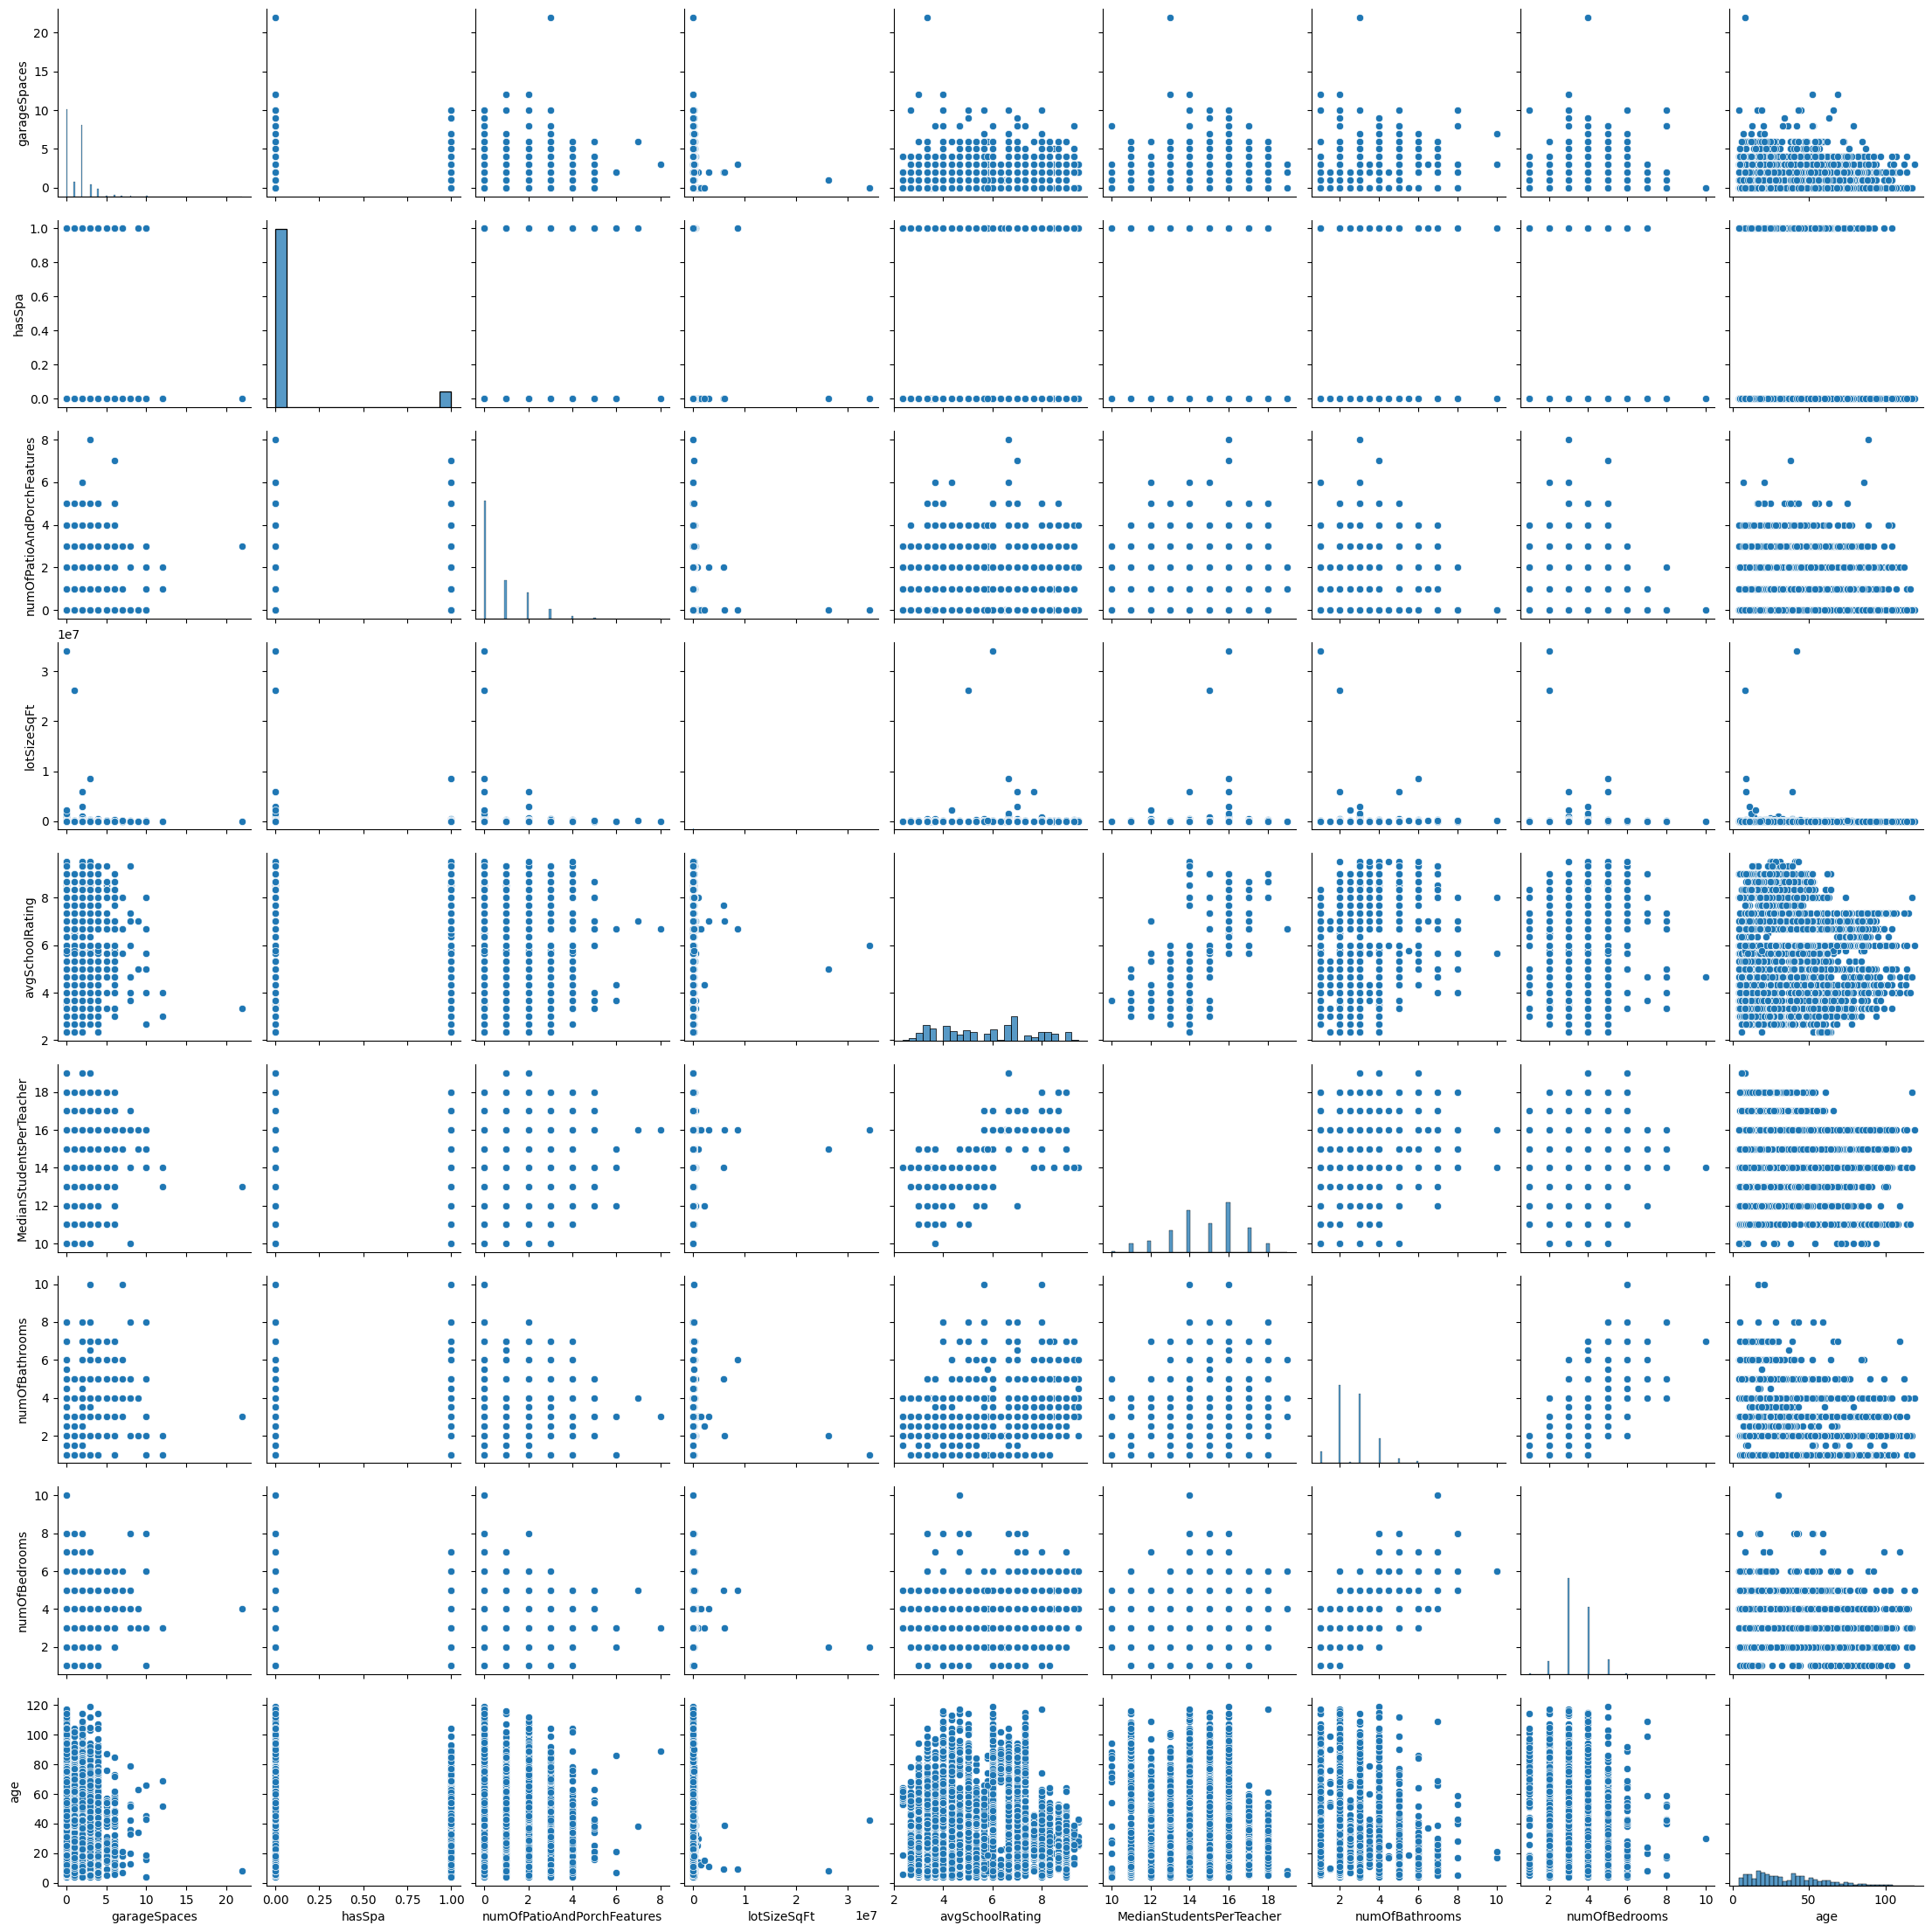

In [ ]:
selected_features = ['garageSpaces','hasSpa','numOfPatioAndPorchFeatures','lotSizeSqFt','avgSchoolRating','MedianStudentsPerTeacher',
                     'numOfBathrooms','numOfBedrooms','priceRange','age']
sns.pairplot(data[selected_features])

In [ ]:
skew_value = skew(data['lotSizeSqFt'])
print(skew_value)

data['lotSizeSqFt'] = np.log1p(data['lotSizeSqFt'])

skew_value = skew(data['lotSizeSqFt'])
print(skew_value)

64.98639833061142
1.9576378437713888


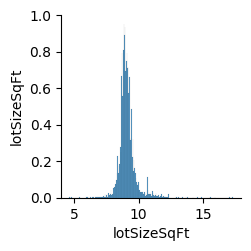

In [ ]:
selected_features = ['lotSizeSqFt']
sns.pairplot(data[selected_features])

<Axes: >

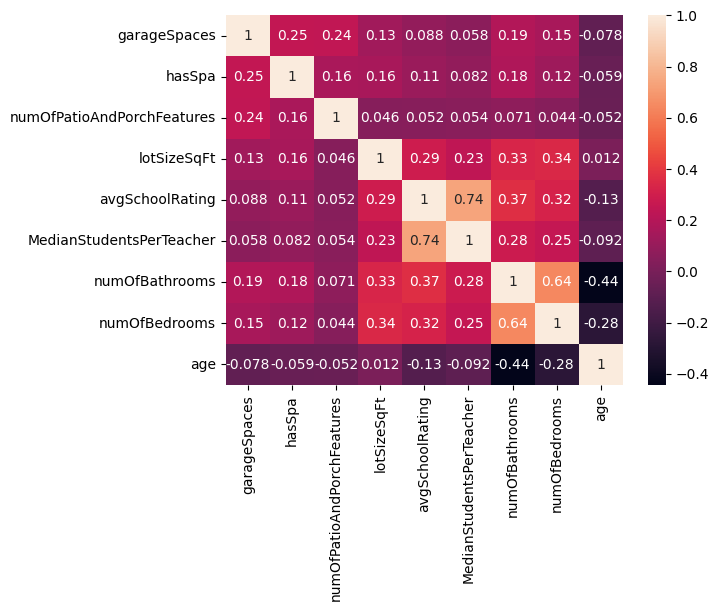

In [ ]:
selected_features = ['garageSpaces','hasSpa','numOfPatioAndPorchFeatures','lotSizeSqFt','avgSchoolRating','MedianStudentsPerTeacher',
                     'numOfBathrooms','numOfBedrooms','age']

matrix_r = data[selected_features].corr()


sns.heatmap(matrix_r, annot=True)

In [ ]:
# city - City where the property is located
# homeType - Property type

for col in list(data.columns):
  print(col, len(data[col].unique()), data[col].unique(), '\n')

city 7 ['austin' 'pflugerville' 'del valle' 'manchaca' 'dripping springs'
 'west lake hills' 'driftwood'] 

homeType 10 ['Single Family' 'Multiple Occupancy' 'Condo' 'Apartment' 'MultiFamily'
 'Townhouse' 'Other' 'Residential' 'Mobile / Manufactured' 'Vacant Land'] 

garageSpaces 13 [ 0  4  2  1  3  6  9  5  7 10  8 12 22] 

hasSpa 2 [False  True] 

numOfPatioAndPorchFeatures 9 [0 1 2 4 3 5 6 7 8] 

lotSizeSqFt 1105 [11.53631967  8.78492763  8.63408694 ...  8.64839688 15.60187567
 10.65145904] 

avgSchoolRating 27 [7.         6.66666667 3.33333333 4.         4.66666667 5.66666667
 5.         3.         6.         7.66666667 5.33333333 8.
 7.33333333 4.33333333 8.33333333 9.         2.66666667 8.66666667
 9.5        3.66666667 3.5        6.33333333 9.33333333 2.33333333
 5.77869409 8.5        6.5       ] 

MedianStudentsPerTeacher 10 [17 16 11 14 15 13 12 18 19 10] 

numOfBathrooms 15 [ 4.   3.   1.   2.   7.   8.   2.5  1.5  3.5  5.   6.   4.5 10.   6.5
  5.5] 

numOfBedrooms 9 [ 4  2 

In [ ]:
data = pd.get_dummies(data, columns=['city','homeType'], drop_first=True)

In [ ]:
data.head()

,garageSpaces,hasSpa,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange,age,...,city_west lake hills,homeType_Condo,homeType_Mobile / Manufactured,homeType_MultiFamily,homeType_Multiple Occupancy,homeType_Other,homeType_Residential,homeType_Single Family,homeType_Townhouse,homeType_Vacant Land
0,0,False,0,11.536320,7.000000,17,4.0,4,650000+,36,...,False,False,False,False,False,False,False,True,False,False
1,0,False,0,8.784928,6.666667,16,3.0,4,350000-450000,27,...,False,False,False,False,False,False,False,True,False,False
2,0,False,0,8.634087,3.333333,11,1.0,2,0-250000,72,...,False,False,False,False,False,False,False,True,False,False
3,4,False,0,8.766706,4.000000,14,2.0,4,0-250000,48,...,False,False,False,False,False,False,False,True,False,False
4,2,False,0,9.283591,7.000000,16,3.0,5,650000+,40,...,False,False,False,False,False,False,False,True,False,False


## Splitting X-Y

In [ ]:
X = data.drop('priceRange',axis=1)
y = data['priceRange']

print(X.shape, y.shape)



(10000, 24) (10000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.1)

## Feature selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

features_importance = rf.feature_importances_

features_importance_df = pd.DataFrame({ 'Feature': X_train.columns,
                                       'Importance': features_importance})

features_importance_df = features_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
features_importance_df

,Feature,Importance
3,lotSizeSqFt,0.251157
8,age,0.220582
4,avgSchoolRating,0.158242
5,MedianStudentsPerTeacher,0.090439
6,numOfBathrooms,0.081090
0,garageSpaces,0.059190
2,numOfPatioAndPorchFeatures,0.056842
7,numOfBedrooms,0.048881
1,hasSpa,0.012643
21,homeType_Single Family,0.006471


In [ ]:
features_select = features_importance_df[features_importance_df['Importance']>0.04]
features_select

features_select_list = list(features_select['Feature'])
features_select_list

['lotSizeSqFt',
 'age',
 'avgSchoolRating',
 'MedianStudentsPerTeacher',
 'numOfBathrooms',
 'garageSpaces',
 'numOfPatioAndPorchFeatures',
 'numOfBedrooms']

In [ ]:
X_train = X_train[features_select_list]
print(X_train.shape)
X_test = X_test[features_select_list]
print(X_test.shape)

(9000, 8)
(1000, 8)


<Axes: xlabel='priceRange', ylabel='Count'>

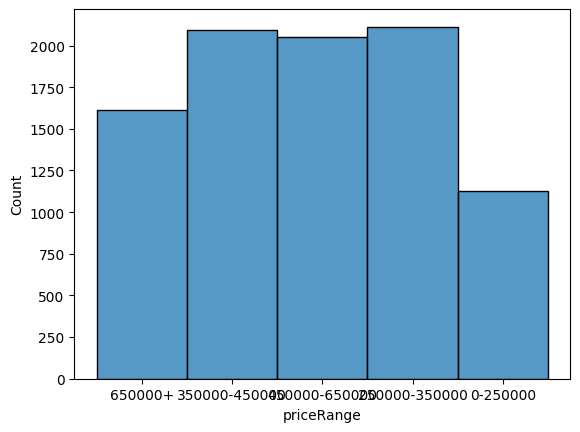

In [ ]:
sns.histplot(y_train)

## Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models = {
    'RandomFores':RandomForestClassifier(),
    'SVM':SVC(),
    'GradientBoosting':GradientBoostingClassifier()
}
print(models)

kfold = KFold(n_splits=5,shuffle=True)

model_performance = {}
for name, model in models.items():
  cv_score = cross_val_score(model, X_train, y_train,cv=kfold, scoring='accuracy')
  model_performance[name] = cv_score
  print(name, cv_score, np.mean(cv_score))




{'RandomFores': RandomForestClassifier(), 'SVM': SVC(), 'GradientBoosting': GradientBoostingClassifier()}
RandomFores [0.55611111 0.54555556 0.52944444 0.53222222 0.53333333] 0.5393333333333333
SVM [0.42166667 0.42388889 0.43111111 0.44277778 0.41111111] 0.4261111111111111
GradientBoosting [0.515      0.54833333 0.52166667 0.53166667 0.55222222] 0.5337777777777777


In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score)

0.558


## Saving model

In [ ]:
import joblib

joblib.dump(rf, 'ramdom_forest.pkl')

['ramdom_forest.pkl']

In [ ]:
model_saved = joblib.load('ramdom_forest.pkl')

In [ ]:
model_saved

In [ ]:
X_test.columns

Index(['lotSizeSqFt', 'age', 'avgSchoolRating', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'garageSpaces', 'numOfPatioAndPorchFeatures',
       'numOfBedrooms'],
      dtype='object')

In [ ]:
y_pred_1 = rf.predict(X_test.iloc[0:1,:])
print(y_pred_1)

['450000-650000']


In [ ]:
y_pred_1 = model_saved.predict(X_test.iloc[0:1,:])
print(y_pred_1)

['450000-650000']


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 3194 to 8085
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lotSizeSqFt                 1000 non-null   float64
 1   age                         1000 non-null   int64  
 2   avgSchoolRating             1000 non-null   float64
 3   MedianStudentsPerTeacher    1000 non-null   int64  
 4   numOfBathrooms              1000 non-null   float64
 5   garageSpaces                1000 non-null   int64  
 6   numOfPatioAndPorchFeatures  1000 non-null   int64  
 7   numOfBedrooms               1000 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 70.3 KB


In [ ]:
print(X_test.iloc[0:1,:])

      lotSizeSqFt  age  avgSchoolRating  MedianStudentsPerTeacher  \
3194     9.372646   18              6.0                        16   

      numOfBathrooms  garageSpaces  numOfPatioAndPorchFeatures  numOfBedrooms  
3194             4.0             0                           2              5  
